<a href="https://colab.research.google.com/github/ismailkaya83/MY-DEEP-LEARNING-NOTEBOOKS/blob/master/Classifying_movie_reviews_a_binary_classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Two-class classification, or binary classification, is one of the most common kinds of machine-learning problem. In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [1]:
"Loading the IMDB dataset"

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size. If we didn’t set this limit, we’d be working with 88,585 unique words in the training data, which is unnecessarily large. Many of these words only occur in a single sample, and thus can’t be meaningfully used for classification.

The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [2]:
train_data, len(train_data)

(array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
        list([1, 194, 1153, 194, 8255, 78, 22

In [3]:
train_labels, len(train_labels)

(array([1, 0, 0, ..., 0, 1, 0]), 25000)

Because you’re restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000:



In [4]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here’s how you can quickly decode one of these reviews back to English words:



In [5]:
word_index = imdb.get_word_index() 
# word_index is a dictionary mapping words to an integer index.

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Reverses it, mapping integer indices to words

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# Decodes the review. Note that the indices are offset by 3 because 0,1, and 2 are reserved indices for "padding","start of sequence", and "unknownn"

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### ***Preparing the data***

You can’t directly feed lists of integers into a neural network. They have all different lengths, but a neural network expects to process contiguous batches of data. You have to turn your lists into tensors. There are two ways to do that:

- Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, 1), and then use it as the first layer in your model a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book).

- One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [8, 5] into a 10,000-dimensional vector that would be all 0s except for indices 8 and 5, which would be 1s. Then you could use as the first layer in your model a Dense layer, capable of handling floating-point vector data.

In [7]:
"Encoding the integer sequences via one-hot encoding"

import numpy as np
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) # creates an all-zero matrix of shape(len(sequences, dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

You should also vectorize your labels, which is straightforward:

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### ***Building your model***

The input data is vectors, and the labels are scalars (1s and 0s): this is one of the simplest problem setups you’ll ever encounter. A type of model that performs well on such a problem is a plain stack of densely-connected (Dense) layers with relu activations.

There are two key architecture decisions to be made about such a stack of Dense layers:

- How many layers to use = Two intermediate layers with 16 units each
- How many units to choose for each layer = A third layer that will output the scalar prediction regarding the sentiment of the current review

In [10]:
"model definition"

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

The first argument being passed to each Dense layer is the number of units in the layer: the dimensionality of representation space of the layer. Each such Dense layer with a relu activation implements the following chain of tensor operations:

In [11]:
output = relu(dot(W, input) + b)

NameError: ignored

Having 16 units means the weight matrix W will have shape (input_dimension, 16): the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation). You can intuitively understand the dimensionality of your representation space as “how much freedom you’re allowing the model to have when learning internal representations.” Having more units (a higher-dimensional representation space) allows your model to learn more-complex representations, but it makes the model more computationally expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).

The intermediate layers use relu as their activation function, and the final layer uses a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”: how likely the review is to be positive). A relu (rectified linear unit) is a function meant to zero out negative values (see figure 3.4), whereas a sigmoid “squashes” arbitrary values into the [0, 1] interval (see figure 3.5), outputting something that can be interpreted as a probability.

Finally, you need to choose a loss function and an optimizer. Because you’re facing a binary classification problem and the output of your model is a probability (you end your model with a single-unit layer with a sigmoid activation), it’s best to use the binary_crossentropy loss. It isn’t the only viable choice: you could use, for instance, mean_squared_error. But crossentropy is usually the best choice when you’re dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

As for the choice of the optimizer, we’ll go with rmsprop, which is a usually a good default choice for virtually any problem.

Here’s the step where you configure the model with the rmsprop optimizer and the binary_crossentropy loss function. Note that you’ll also monitor accuracy during training.

In [12]:
"compiling the model"

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### ***Validating your approach***

As you learned in chapter 3, a deep learning model should never be evaluated on its training data — it’s standard practice to use a “validation set” to monitor the accuracy of the model during training. Here, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [13]:
"Setting aside a validation set"

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

You’ll now train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At the same time, you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by passing the validation data as the validation_data argument.

In [14]:
"Training your model"

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5833 - acc: 0.7106 - val_loss: 0.5020 - val_acc: 0.8624
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3885 - acc: 0.8927 - val_loss: 0.3580 - val_acc: 0.8783
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2745 - acc: 0.9207 - val_loss: 0.3070 - val_acc: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2086 - acc: 0.9387 - val_loss: 0.3112 - val_acc: 0.8754
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1680 - acc: 0.9506 - val_loss: 0.2887 - val_acc: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1399 - acc: 0.9565 - val_loss: 0.2859 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1132 - acc: 0.9697 - val_loss: 0.2946 - val_acc: 0.8864
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0967 - a

On CPU, this will take less than 2 seconds per epoch — training is over in 20 seconds. At the end of every epoch, there is a slight pause as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to model.fit() returns a History object, as you’ve seen in chapter 3. This object has a member history, which is a dictionary containing data about everything that happened during training. Let’s look at it:

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

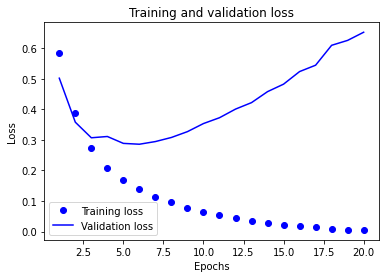

In [16]:
" Plotting the training and validation loss"

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

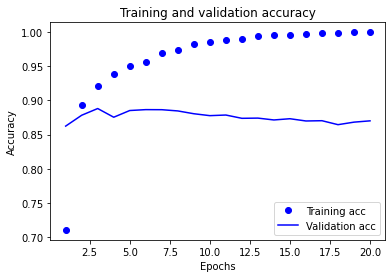

In [17]:
"Plotting the training and validation accuracy"

plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradient-descent optimization — the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we warned against earlier: a model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting: after the fourth epoch, you’re over-optimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

In this case, to prevent overfitting, you could stop training after three epochs.

Let’s train a new model from scratch for four epochs and then evaluate it on the test data.

In [18]:
"Retraining a model from scratch"

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4509 - accuracy: 0.8202
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2563 - accuracy: 0.9102
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2013 - accuracy: 0.9276
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2938 - accuracy: 0.8837


In [19]:
results

[0.29380685091018677, 0.8837199807167053]

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.

### ***Using a trained model to generate predictions on new data***

After having trained a model, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method.

In [20]:
model.predict(x_test)

array([[0.19945452],
       [0.9996482 ],
       [0.8747668 ],
       ...,
       [0.13448314],
       [0.09217052],
       [0.62122893]], dtype=float32)

As you can see, the model is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).

# ***Wrapping up***

- You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it — as tensors — into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options, too.
- Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.
- In a binary classification problem (two output classes), your model should end with a Dense layer with one unit and a sigmoid activation: the output of your model should be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.
- The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.